In [40]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import cv2
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt


In [41]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('gpu')
else:
    device = torch.device('cpu')
    print('cpu')

cpu


ResNet50 model

In [42]:
class ResNet50Bottom(nn.Module):
    def __init__(self, original_model):
        super(ResNet50Bottom, self).__init__()
        self.features = nn.Sequential(*list(original_model.children())[:-2])
        
    def forward(self, x):
        x = self.features(x)
        return x


In [54]:
img = cv2.imread('dog.jpg')
#img = img.transpose(2,0,1).astype(np.float32)[None]
img = cv2.resize(img, (224,224))

print(img.shape)

#cv2.imshow('img', img)
#cv2.waitKey(100)

transform = transforms.ToTensor()
img = transform(img)

img = img.reshape(1,3,224,224)
print(img.shape)

res50_model = models.resnet50(pretrained=True)
res50_model.eval()

res50_conv2 = ResNet50Bottom(res50_model)

res50_conv2.eval()

outputs = res50_conv2(img)

print(outputs.data.shape)  # => torch.Size([4, 2048, 7, 7])

prob = nn.Softmax(dim=1)(outputs)

print(prob.shape)

(224, 224, 3)
torch.Size([1, 3, 224, 224])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])


In [46]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Show top categories per image
top5_prob, top5_catid = torch.topk(prob, 5)


for i in range(top5_prob.size(0)):
    print(top5_catid, top5_prob)

    #print(categories[top5_catid[i]], top5_prob[i].item())



for idx in top5_catid[0]:
    print(categories[idx])

tensor([[[[5, 6, 3, 4, 0],
          [5, 0, 6, 1, 4],
          [0, 5, 1, 6, 4],
          ...,
          [4, 3, 0, 5, 1],
          [4, 2, 1, 0, 5],
          [4, 3, 1, 2, 0]],

         [[6, 5, 1, 4, 0],
          [5, 1, 0, 6, 4],
          [1, 0, 5, 6, 4],
          ...,
          [1, 0, 6, 5, 2],
          [0, 6, 1, 5, 2],
          [0, 1, 6, 5, 2]],

         [[5, 6, 1, 3, 4],
          [5, 1, 0, 6, 4],
          [0, 5, 1, 6, 4],
          ...,
          [0, 6, 5, 1, 4],
          [0, 5, 6, 4, 1],
          [2, 3, 4, 1, 0]],

         ...,

         [[3, 5, 4, 2, 6],
          [1, 5, 0, 6, 4],
          [1, 0, 5, 6, 2],
          ...,
          [1, 6, 0, 5, 2],
          [6, 0, 1, 5, 2],
          [6, 0, 1, 5, 2]],

         [[5, 6, 4, 3, 1],
          [5, 0, 1, 6, 4],
          [1, 0, 5, 6, 4],
          ...,
          [1, 0, 6, 5, 2],
          [1, 0, 6, 2, 5],
          [1, 0, 6, 5, 2]],

         [[4, 2, 3, 5, 6],
          [5, 4, 6, 1, 0],
          [5, 0, 6, 1, 4],
         

TypeError: only integer tensors of a single element can be converted to an index

Dataset preprocessing

In [24]:
train_path = "D:\\wikiart_train\\"
test_path = "D:\\wikiart_valid\\"


# Run inference on CPU
trainData = []
for filename in os.listdir(train_path):
    if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".PNG"):
        img = cv2.imread(train_path+filename)
        if img is not None:
            #print(test_path+filename)
            img = cv2.resize(img, (224,224))
            trainData.append(img)
trainData = np.array(trainData)

testData = []
for filename in os.listdir(test_path):
    if filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".PNG"):
        img = cv2.imread(test_path+filename)
        if img is not None:
            #print(test_path+filename)
            img = cv2.resize(img, (224,224))
            testData.append(img)
testData = np.array(testData)


In [47]:
metaID = []
metaPath = []

for root, dirs, filenames in os.walk('mobile_AI\gallery_data'):
    for filename in filenames:
        first, last = os.path.splitext(filename)
        if last != '.PNG' or not first.isdigit():
            continue
        
        path = os.path.join(root, filename)

        metaID.append(first)
        metaPath.append(path)    

dataset = list(zip(metaID, metaPath))
print(dataset)

[('1', 'mobile_AI\\gallery_data\\dankook\\1.PNG'), ('10', 'mobile_AI\\gallery_data\\dankook\\10.PNG'), ('2', 'mobile_AI\\gallery_data\\dankook\\2.PNG'), ('3', 'mobile_AI\\gallery_data\\dankook\\3.PNG'), ('4', 'mobile_AI\\gallery_data\\dankook\\4.PNG'), ('5', 'mobile_AI\\gallery_data\\dankook\\5.PNG'), ('6', 'mobile_AI\\gallery_data\\dankook\\6.PNG'), ('7', 'mobile_AI\\gallery_data\\dankook\\7.PNG'), ('8', 'mobile_AI\\gallery_data\\dankook\\8.PNG'), ('9', 'mobile_AI\\gallery_data\\dankook\\9.PNG'), ('11', 'mobile_AI\\gallery_data\\dongguk\\11.PNG'), ('12', 'mobile_AI\\gallery_data\\dongguk\\12.PNG'), ('13', 'mobile_AI\\gallery_data\\dongguk\\13.PNG'), ('14', 'mobile_AI\\gallery_data\\dongguk\\14.PNG'), ('15', 'mobile_AI\\gallery_data\\dongguk\\15.PNG'), ('16', 'mobile_AI\\gallery_data\\dongguk\\16.PNG'), ('17', 'mobile_AI\\gallery_data\\dongguk\\17.PNG'), ('18', 'mobile_AI\\gallery_data\\dongguk\\18.PNG'), ('19', 'mobile_AI\\gallery_data\\dongguk\\19.PNG'), ('20', 'mobile_AI\\gallery_da

In [37]:
def show_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        image = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
        plt.imshow(image, interpolation='nearest')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

Feature Extraction

In [55]:
def extract_features(model, dataset):
    feature_list = []
    for (a,b) in dataset:
        sampleImg = cv2.imread(b)
        sampleImg = cv2.resize(sampleImg, (224,224))
        
        transform = transforms.ToTensor()
        sampleImg = transform(sampleImg)

        img = sampleImg.reshape(1,3,224,224)

        out = model(img)
        print(out.shape)

        feature_list.append((a,out))

    return feature_list
        
feature_list = extract_features(res50_conv2, dataset)

torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 7, 7])


KeyboardInterrupt: 

(9550, 224, 224, 3)
(2020, 224, 224, 3)


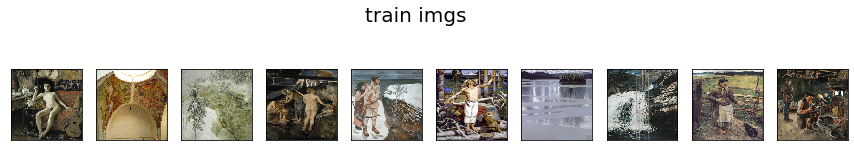

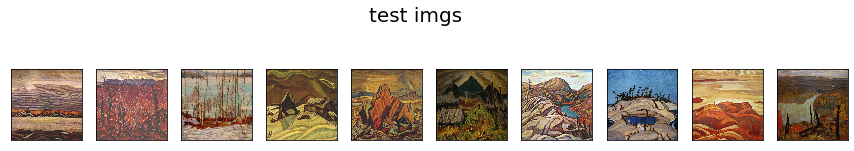

In [38]:
print(trainData.shape)
print(testData.shape)
show_data(trainData, title="train imgs")
show_data(testData, title="test imgs")

In [3]:
import mysql.connector as sql
from mysql.connector import Error

try:
    connection = sql.connect(host='3.39.206.71',
                                         database='peanart',
                                         port=3306,
                                         user='root',
                                         password='1234',
                                         auth_plugin='mysql_native_password')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)


        cursor.execute("SELECT * FROM tb_user")
        record2 = cursor.fetchone()

        print(record2)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


Connected to MySQL Server version  8.0.29-0ubuntu0.22.04.2
You're connected to database:  ('peanart',)
(1, 'test2', '60303ae22b998861bce3b28f33eec1be758a213c86c93c076dbe9f558c11c752', 'test2', 'test2', 'test2', datetime.datetime(2022, 6, 8, 5, 21, 4), datetime.datetime(2022, 6, 8, 5, 21, 4))
MySQL connection is closed
